# CRIANDO UM FLUXO DE DADOS

![](https://www.energysys.com/wp-content/uploads/2020/04/Energysys-gif-data-collection_pipeline_1000x891-1.gif) 

***PIPELINE* DE DADOS**<br>
Um pipeline de dados é uma série de etapas de processamento de dados. Se os dados não estiverem carregados na plataforma de dados, eles serão ingeridos no início do pipeline. Depois, há uma série de etapas em que cada etapa fornece uma saída que é a entrada para a próxima etapa. Isso continua até que o pipeline seja concluído. Em alguns casos, etapas independentes podem ser executadas em paralelo.

Os pipelines de dados consistem em três elementos principais: uma origem, uma etapa ou etapas de processamento e um destino. Em alguns pipelines de dados, o destino pode ser chamado de coletor. Os pipelines de dados permitem o fluxo de dados de um aplicativo para um data warehouse, de um data lake para um banco de dados analítico ou para um sistema de processamento de pagamento, por exemplo. Os pipelines de dados também podem ter a mesma origem e coletor, de forma que o pipeline seja puramente para modificar o conjunto de dados. Sempre que os dados são processados entre o ponto A e o ponto B (ou pontos B, C e D), há um pipeline de dados entre esses pontos.

# 6. PRÉ-PROCESSAMENTO DE TEXTOS

Esboço Geral do Pré-processamento de Texto
Então, como fazemos o pré-processamento de texto? Geralmente, existem 3 componentes principais:
Tokenização
Normalização
Remoção de ruído
Resumindo, a tokenização consiste em dividir strings de texto em pedaços menores, ou “tokens”. Os parágrafos podem ser convertidos em frases e as frases podem ser convertidas em palavras. A normalização visa colocar todo o texto em um campo de jogo nivelado, por exemplo, convertendo todos os caracteres em letras minúsculas. A remoção de ruído limpa o texto, por exemplo, remove os espaços em branco extras.

## 6.1. Preparar ambiente 

In [ ]:
#Instalar bibliotecas necessárias 
! pip install Unidecode
! pip install nltk
! pip install wordcloud

In [ ]:
#Importar bibliotecas necessárias
import unidecode
import nltk
import re
import os

#Baixar pacotes necessários
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words("portuguese")

#Adicionar novas palavra as stopwords
palavras_vazias=['nao','pra']

for palavra in palavras_vazias:
  stopwords.append(palavra)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 6.1. Criar função de processamento de texto

In [ ]:
def processador(file):
  #Ler arquivo
  texto=open(file,'r',encoding="utf8").read()
  #Padronixar letras
  texto=texto.lower()
  #Remover acentos
  texto=unidecode.unidecode(texto)
  #Remover caracteres especiais
  texto=re.sub('\W+',' ',texto)
  
  #Remover stopwords
  palavras_validas=[palavra for palavra in texto.split() if palavra not in stopwords]
  texto=" " .join(palavras_validas)
  return texto

#Aplicar
texto=processador('Rap Lord.txt')
texto

'lutei entrar vou sair pertencem devolvi acido metal causa efeito letal teto baixo espreme respira pira ta mira firma entao espera recupera folego comigo morre nunca cai tento sorte woodstock flow metodico toma quer dou pode destino caixa surpresa leopardo zebra diz ce quer ser predador presa assim percorri beira terra ate sorte dizer menino voce aval tempo essencia elevo peito excesso essencial bom acomodar satisfacao verso ecoar vendo polpa vou poupar entao demorou mano let s go quero foda disser to pe vou mantendo fe ate mano vou correndo igual rale adivinha quer vagabundo quer quer ne quero ver dinheiro responsa ser amigo onca jacare banca vira bolsa mano entao mostre cara convivencia malandro ja costa fala carai diz gosta gosta tambem ze vagabundo ve bota ve pe quer ver pe jao sei ate sao to contencao bababarebabareba papo cuzao voce quer provar ja provei sei bem representei levei caminhada ninguem palavra conforto recebida vida resume dom jao vai vai espero ego atrapalhe conduta 

#7.NUVENS DE PALAVRAS (*WORD CLOUDS*)

As Nuvens de Palavras (também conhecidas como word clouds wordle, word collage ou tag cloud) são representações visuais de palavras que dão maior destaque às palavras que aparecem com mais frequência.



In [ ]:
%matplotlib inline  
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import numpy as np

In [ ]:
nuvem_palavras=WordCloud().generate(texto)

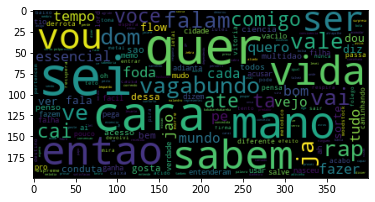

In [ ]:
#Figura
plt.imshow(nuvem_palavras)
plt.show()

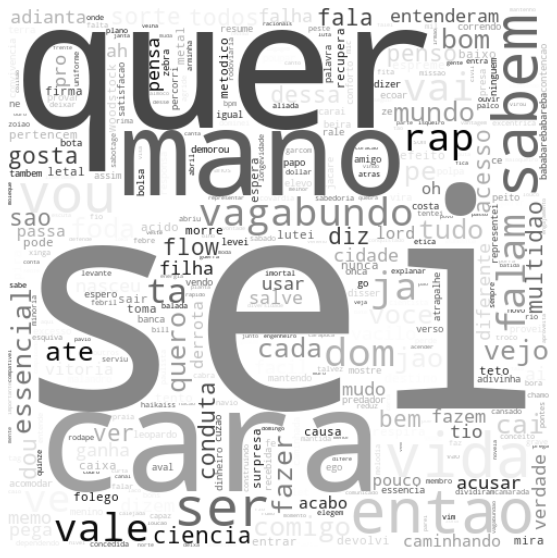

In [ ]:
#Definição e outros detalhes
nuvem = WordCloud(
                  background_color="white", # Cor de fundo
                  width=500,                # Lagura da imagem
                  height=500,               # Altura da imagem
                  max_words=1000,           # N° maximo de palavras
                  max_font_size=500,        # Tamanho máximo da fonte das palvras
                  min_font_size=1,          # Tamanho mínimo da fonte das palvras
                  colormap='Greys_r'        # Esquema de cores da figura
                  ).generate(texto)
#Tamanho da imagem
plt.figure(figsize=(10,10))
#Resolução                                                                                   
plt.imshow(nuvem,interpolation='bilinear')
#Remover eixos da imagem                                                           
plt.axis("off")
#Exbir imagem                                                                                               
plt.show()

##7.1. Nuvens estilizadas (máscaras)

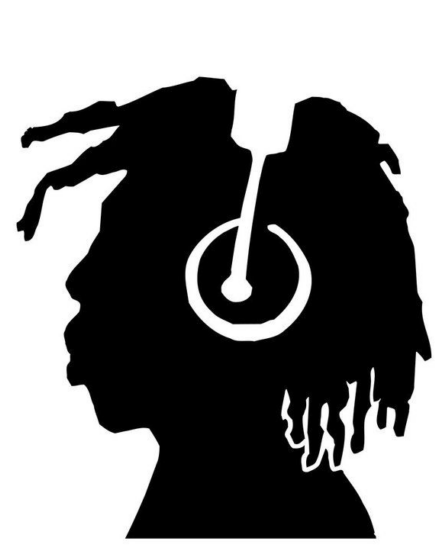

In [ ]:
# Ler a imagem
mascara = np.array(Image.open("rapper.jpg"))
# Definir tamanho do plot
ax=plt.figure(figsize=(10,10))
# Exbir imagem
ax=plt.imshow(mascara,cmap=plt.cm.gray,interpolation='bilinear')
# Remover exixos
ax=plt.axis("off")

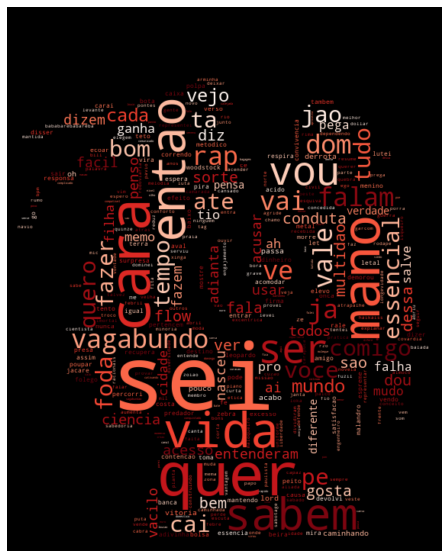

In [ ]:
# Gerar uma nuvem
nuvem = WordCloud(
                  background_color="black", # Cor de fundo
                  width=500,                # Lagura da imagem
                  height=500,               # Altura da imagem
                  contour_width=.1,         # Lagura do contorno
                  contour_color='black',    # Cor do contorno
                  mask=mascara,             # Imagem da mácara
                  max_words=1000,           # N° maximo de palavras
                  max_font_size=200,        # Tamanho máximo da fonte das palvras
                  min_font_size=1,          # Tamanho mínimo da fonte das palvras
                  colormap='Reds_r'         # Esquema de cores da figura
                  ).generate(texto)
#Definir figura
ax=plt.figure(figsize=(10,10))
ax=plt.axis("off")     
ax=plt.imshow(nuvem,interpolation='bilinear')
#Salvar figura
nuvem.to_file("nuvem_estilizada.png")
ax=ax

##7.2. Teste da seção
Crie uma função que tenha como entrada um texo e como saida uma nuvem de palavras (estilizada ou não)

In [ ]:
def fazedor_nuvens(text_file,figure_file):
  #Ler arquivos
  texto=processador(text_file)
  mascara = np.array(Image.open(figure_file))
  #Criar nuvem
  nuvem = WordCloud(
                  background_color="black", # Cor de fundo
                  width=500,                # Lagura da imagem
                  height=500,               # Altura da imagem
                  contour_width=.1,         # Lagura do contorno
                  contour_color='black',    # Cor do contorno
                  mask=mascara,             # Imagem da mácara
                  max_words=1000,           # N° maximo de palavras
                  max_font_size=200,        # Tamanho máximo da fonte das palvras
                  min_font_size=1,          # Tamanho mínimo da fonte das palvras
                  colormap='Reds_r'         # Esquema de cores da figura
                  ).generate(texto)
  #Definir figura
  ax=plt.figure(figsize=(10,10))
  ax=plt.axis("off")     
  ax=plt.imshow(nuvem,interpolation='bilinear')
  #Salvar figura
  nuvem.to_file("minha_nuvem.png")
  ax=ax


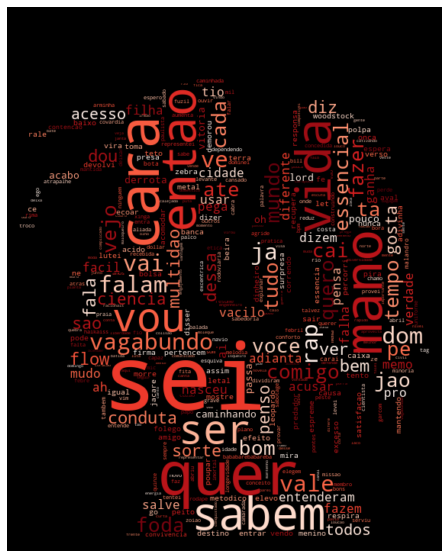

In [ ]:
#Testar função
fazedor_nuvens('Rap Lord.txt','rapper.jpg')